In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv('content.csv')
words = df[['Kontantpris','description']]
words = words.dropna()
words['Kontantpris'] = words['Kontantpris'].str.replace('.', '').astype(float)
words.head()

C:\Users\marko\AppData\Local\Temp/ipykernel_14232/383070933.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  words['Kontantpris'] = words['Kontantpris'].str.replace('.', '').astype(float)


,Kontantpris,description
0,3495000.0,"Med nøgleord som grønne omgivelser, lækkert ly..."
1,1795000.0,Lejligheden på Castenskjoldsvej 3 har den perf...
2,4750000.0,Beliggenheden er noget helt særligt i et af Aa...
3,2195000.0,danbolig Hjallese har nu fornøjelsen af at byd...
4,3595000.0,"Arkitekten har haft fokus på beliggenheden, og..."


In [117]:
import re

def cleaner(document):
    document = document.lower() #To lower case
    document = re.sub(r'[^\w\s]','', document) #Remove non-alphanumeric characters
    return document

words['description'] = words['description'].apply(cleaner)

In [118]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("danish")

stop_words = set(stopwords.words('danish'))

# Preprocess the description column: lowercase, tokenize, lemmatize, and remove stopwords
words['clean_description'] = words['description'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.lower().split() if word not in stop_words]))
words['clean_description']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       nøgleord grøn omgiv lækkert lysindfald natursk...
1       lej castenskjoldsvej 3 perfek beliggen marielu...
2       beliggen helt sær aarhus absolut mest attrakti...
3       danbo hjalles fornøj byd indenfor skøn villa m...
4       arkitek haft fokus beliggen ejendom præg smuk ...
                              ...                        
5065    områd centralt vanged gentoft kommun find skøn...
5066    enorm velvoksn træer havebassin skovstyk sid v...
5067    børnefamili får plad vedligeholdelsesfri etpla...
5068    ønsk skab jer drømmebo firlænged gård træng is...
5069    udk charm ejendom land omgiv fred belig 3465 m...
Name: clean_description, Length: 4593, dtype: object

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

words['set'] = np.where(np.random.rand(len(words)) <= 0.8, 'train', 'test')
df_train = words[words.set=="train"]
df_test = words[words.set=="test"]

# Sort the data randomly to mix positive and negative reviews
np.random.seed(0)
df_train = words.reindex(np.random.permutation(df_train.index))
df_test = words.reindex(np.random.permutation(df_test.index))

# Take out X and Y variable
x_train = df_train['clean_description'].values
x_test = df_test['clean_description'].values
y_train = df_train['Kontantpris'].values
y_test = df_test['Kontantpris'].values

tfidf = TfidfVectorizer()
bag_of_words = tfidf.fit_transform(x_train)

lr = LogisticRegression(random_state=0) #Text classifier
lr.fit(bag_of_words,y_train)

LogisticRegression(random_state=0)

In [122]:
test_preds.shape

(165,)

In [123]:
x_test_bag = tfidf.transform(x_test)

# Then we predict the sentiment 
train_preds = lr.predict(bag_of_words)
test_preds = lr.predict(x_test_bag)

# And we compare the predicted sentiment with the actual sentiment
print("Training accuracy:", np.mean([(train_preds==y_train)]))
print("Testing accuracy:", np.mean([(test_preds==y_test)]))

Training accuracy: 0.37462318443409154
Testing accuracy: 0.02754237288135593


In [124]:
# Get all the words (features)
features = ['_'.join(s.split()) for s in tfidf.get_feature_names()]

# Get the coefficients from the fitted model
coefficients = lr.coef_

# Present coefficients for each feature
coefs_df = pd.DataFrame.from_records(coefficients, columns=features)
coefs_df

,00,0035,0095,00ern,00ved,01,0100,01062023,01112023,02,...,østr,østresøbad,østrigsk,østsid,østsyd,østvend,øtøv,øverst,øvr,øvrigtj
0,-0.000588,-0.000041,-0.000053,-0.000268,-0.000026,-0.000049,-0.000231,-0.000048,-0.000045,-0.000080,...,-0.000311,-0.000052,-0.000030,-0.000194,-0.000038,-0.000910,-0.000034,-0.002164,-0.002557,-0.000034
1,-0.000585,-0.000042,-0.000054,-0.000269,-0.000024,-0.000049,-0.000233,-0.000048,-0.000044,-0.000079,...,-0.000312,-0.000051,-0.000031,-0.000192,-0.000039,-0.000910,-0.000034,-0.002169,-0.002559,-0.000034
2,-0.000584,-0.000041,-0.000054,-0.000267,-0.000025,-0.000049,-0.000233,-0.000047,-0.000046,-0.000080,...,-0.000310,-0.000050,-0.000030,-0.000194,-0.000038,-0.000913,-0.000034,-0.002157,-0.002554,-0.000034
3,-0.000584,-0.000041,-0.000052,-0.000269,-0.000024,-0.000049,-0.000231,-0.000048,-0.000045,-0.000080,...,-0.000310,-0.000050,-0.000030,-0.000202,-0.000038,-0.000913,-0.000034,-0.002152,-0.002555,-0.000034
4,-0.001707,-0.000123,-0.000156,-0.000798,-0.000073,-0.000143,-0.000670,-0.000146,-0.000146,-0.000236,...,-0.000910,-0.000149,-0.000094,-0.000569,-0.000116,-0.002667,-0.000101,-0.006375,-0.007438,-0.000099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,-0.001212,-0.000082,-0.000109,-0.000535,-0.000049,-0.000105,-0.000484,-0.000097,-0.000094,-0.000168,...,-0.000635,-0.000101,-0.000062,-0.000387,-0.000082,-0.001870,-0.000074,-0.004480,-0.005194,-0.000066
601,-0.000583,-0.000041,-0.000052,-0.000269,-0.000024,-0.000049,-0.000230,-0.000048,-0.000045,-0.000080,...,-0.000309,-0.000051,-0.000031,-0.000193,-0.000040,-0.000915,-0.000034,-0.002174,-0.002553,-0.000034
602,-0.000581,-0.000041,-0.000053,-0.000267,-0.000024,-0.000050,-0.000229,-0.000048,-0.000044,-0.000079,...,-0.000313,-0.000051,-0.000030,-0.000192,-0.000039,-0.000906,-0.000035,-0.002158,0.121713,-0.000034
603,-0.000595,-0.000042,-0.000054,-0.000271,-0.000024,-0.000051,-0.000237,-0.000050,-0.000046,-0.000078,...,-0.000312,-0.000050,-0.000031,-0.000198,-0.000041,-0.000925,-0.000034,-0.002171,-0.002586,-0.000035


In [125]:
# Print the 20 words with highest positive sentiment
print(coefs_df.T.sort_values(by=[0], ascending=False).head(20))

                         0         1         2         3         4    \
købstilbud          0.346697 -0.000203 -0.000203 -0.000200 -0.000594   
havneby             0.339439 -0.000244 -0.000243 -0.000240 -0.000707   
tilslutningsbidrag  0.249782 -0.000285 -0.000293 -0.000278 -0.000833   
telekommunikation   0.199108 -0.000059 -0.000059 -0.000057 -0.000170   
anten               0.199108 -0.000059 -0.000059 -0.000057 -0.000170   
kattegat            0.161064 -0.000421 -0.000424 -0.000419 -0.001212   
intern              0.158964 -0.000299 -0.000300 -0.000294 -0.000869   
odd                 0.137808 -0.001263 -0.001271 -0.001276 -0.003738   
kloak               0.134039 -0.000952 -0.000973 -0.000944 -0.002812   
evt                 0.124990 -0.001284 -0.001285 -0.001282 -0.003744   
holbæk              0.116006 -0.003418 -0.003434 -0.003425 -0.010042   
kommun              0.111853  0.228334 -0.001850 -0.001836 -0.005375   
mv                  0.101498 -0.002797 -0.002802 -0.002782 -0.00

In [126]:
# Print the 20 words with lowest positive sentiment
print(coefs_df.T.sort_values(by=[0], ascending=True).head(20))

              0         1         2         3         4         5         6    \
kan     -0.037257 -0.037264  0.010974 -0.037241 -0.047270  0.088163 -0.037308   
vær     -0.032769 -0.032724 -0.032718 -0.032810 -0.056377 -0.097372 -0.032767   
stor    -0.032432 -0.032402 -0.032453 -0.032387 -0.094545 -0.014698  0.004680   
hus     -0.030882 -0.030842 -0.030921  0.244564 -0.037026  0.002155 -0.030938   
badevær -0.030451 -0.030421 -0.030387 -0.030481 -0.050755 -0.090352 -0.030447   
to      -0.029088 -0.029039 -0.029032 -0.029123 -0.085079 -0.086308 -0.029049   
lig     -0.028818 -0.028833  0.078907 -0.028809  0.031706  0.020956  0.048288   
bol     -0.027858 -0.027814 -0.027835 -0.027791  0.023519 -0.083054 -0.027856   
lej     -0.026818 -0.026891 -0.026703 -0.026600 -0.077720 -0.078956 -0.026828   
ejendom -0.026744  0.176339 -0.026813 -0.026659  0.207014  0.021563 -0.026726   
får     -0.025495 -0.025489  0.005307  0.068821 -0.020350 -0.045378 -0.025476   
stue    -0.022122 -0.022101 

Correlation between number of words and price: 0.2623163006658871


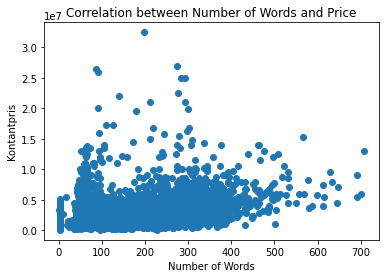

In [127]:
# Create a new column with the number of words in the description
words['num_words'] = words['description'].apply(lambda x: len(str(x).split()))

# Calculate the correlation coefficient
correlation = np.corrcoef(words['num_words'], words['Kontantpris'])[0, 1]

# Print the correlation coefficient
print(f"Correlation between number of words and price: {correlation}")

# Visualize the correlation using a scatter plot
plt.scatter(words['num_words'], words['Kontantpris'])
plt.xlabel('Number of Words')
plt.ylabel('Kontantpris')
plt.title('Correlation between Number of Words and Price')
plt.show()

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words = set(stopwords.words('danish'))
count = CountVectorizer(stop_words=stop_words, max_df=0.1, max_features=5000)
bag = count.fit_transform(words['description'].values)

In [129]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10,random_state=123) #The random_state parameter pass an integer that makes the result reproducible 
review_topics = lda.fit_transform(bag)

In [130]:
n_top_words = 7
word_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_): #lda.components_ stores a matrix containing the word importance for each topic
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([word_names[i]
    for i in topic.argsort()\
        [:-n_top_words - 1:-1]]))

Topic 1:
kvm aarhus bugten tilhørende placeret besøg yderligere
Topic 2:
sommerhus sommerhuset strand holstebro meter grunden langt
Topic 3:
by grunden kørsel silkeborg bygge odense funder
Topic 4:
rammer sikrer nær endelig glæd gøremål privatliv
Topic 5:
aarhus mere lejligheden vandet nydes altan solen
Topic 6:
frem etplansvilla opholdsmiljø klar opholdsrum blandt halvandet
Topic 7:
salen fin mindre kvm ca fint værksted
Topic 8:
familie hvilket ekstra skabe ønsker perfekte familien
Topic 9:
via findes bla herfra lækkert husets videre
Topic 10:
lejligheden altan lejlighedens fælles kælderrum badeværelset ejerforening
